<a href="https://colab.research.google.com/github/liuxiu842/ML/blob/master/Mnist_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1797, 64)
[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]
0


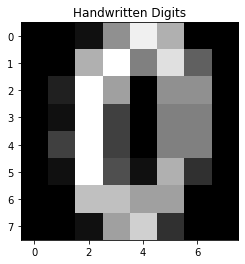

LR准确率: 0.9644


In [0]:
# -*- coding: utf-8 -*-
# 使用LR进行MNIST手写数字分类
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# loading data
digits = load_digits()
data = digits.data

i = 10
print(data.shape)
print(digits.images[i])
print(digits.target[i])

plt.gray()
plt.title('Handwritten Digits')
plt.imshow(digits.images[i])
plt.show()

#split data
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

#z-Score
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

# create LR classifier
lr = LogisticRegression()
lr.fit(train_ss_x, train_y)
predict_y = lr.predict(test_ss_x)

print('LR准确率: %0.4lf' % accuracy_score(predict_y, test_y))

In [0]:
# Action1: 针对mnist数据集进行分类，采用CART决策树
from sklearn import tree
clf = tree.DecisionTreeClassifier()

#训练集使用上个cell的数据
clf.fit(train_ss_x, train_y)
prediction = clf.predict(test_ss_x)
print('TREE准确率: %0.4lf' % accuracy_score(prediction, test_y))

TREE准确率: 0.8644


In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(train_ss_x, train_y)
predict_y = model.predict(test_ss_x)
print('LDA accuracy:%0.4lf'%accuracy_score(predict_y, test_y))

LDA accuracy:0.9378


In [0]:
from sklearn import svm
model = svm.SVC(kernel='rbf', C=1.0, gamma='auto')
model.fit(train_ss_x, train_y)
predict_y = model.predict(test_ss_x)
print('SVM accuracy:%0.4lf'%accuracy_score(predict_y, test_y))


SVM accuracy:0.9867


In [0]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB #高斯朴素贝叶斯 GaussianNB/MultinomialNB/BernoulliNB
model = GaussianNB()
model.fit(train_ss_x, train_y)
predict_y = model.predict(test_ss_x)
print('GaussianNB accuracy:%0.4lf'%accuracy_score(predict_y, test_y))

GaussianNB accuracy:0.7778


In [0]:
from sklearn.neighbors import KNeighborsClassifier #KNN
model = KNeighborsClassifier()
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('KNN准确率: %0.4lf' %accuracy_score(predict_y,test_y))


KNN准确率: 0.9756


In [0]:
from sklearn.ensemble import  AdaBoostClassifier #AdaBoost
from sklearn.tree import DecisionTreeClassifier 
# 创建AdaBoost分类器
# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1)
dt_stump.fit(train_ss_x, train_y)
# 设置AdaBoost迭代次数
n_estimators=500
model = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=n_estimators)
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('AdaBoost准确率: %0.4lf' %accuracy_score(predict_y,test_y))

AdaBoost准确率: 0.9689


In [0]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train_ss_x, train_y)
predict_y = model.predict(test_ss_x)
print('XGBoost accuracy:%0.4lf'%accuracy_score(predict_y,test_y))

XGBoost accuracy:0.9489


In [0]:
# 使用LeNet模型对Mnist手写数字进行识别
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.models import Sequential
import numpy as np

#loading data
(train_x, train_y),(test_x, test_y) = mnist.load_data()

train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
train_x = train_x/255
test_x = test_x/255
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

#create sequential
model = Sequential()
#first layer
model.add(Conv2D(6,kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
#second layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#third layer
model.add(Conv2D(16,kernel_size=(5,5),activation='relu'))
#second layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# 将参数进行扁平化，在LeNet5中称之为卷积层，实际上这一层是一维向量，和全连接层一样
model.add(Flatten())

model.add(Dense(120, activation='relu'))
# 全连接层，输出节点个数为84个
model.add(Dense(84, activation='relu'))
# 输出层 用softmax 激活函数计算分类概率
model.add(Dense(10, activation='softmax'))
# 设置损失函数和优化器配置

model.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
# 传入训练数据进行训练
model.fit(train_x,train_y, batch_size=128, epochs=2,verbose=1, validation_data=(test_x, test_y))
# 对结果进行评估
score = model.evaluate(test_x, test_y)
print('误差:%0.4lf' %score[0])
print('准确率:', score[1])



Epoch 1/2
469/469 [==============================] - 23s 49ms/step - loss: 0.3145 - accuracy: 0.9080 - val_loss: 0.1033 - val_accuracy: 0.9677
Epoch 2/2
313/313 [==============================] - 2s 7ms/step - loss: 0.0585 - accuracy: 0.9824
误差:0.0585
准确率: 0.9824000000953674


In [0]:
# 使用TPOT自动机器学习工具对MNIST进行分类
!pip install tpot
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

digits = load_digits()
data = digits.data
print(digits.target)
X_train, X_test, y_train, y_test = train_test_split(digits.data.astype(np.float64),digits.target.astype(np.float64), train_size=0.75, test_size=0.25)
tpot = TPOTClassifier(generations=5,population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test,y_test))
tpot.export('tpot_mnist_pipline.py')

     |████████████████████████████████| 81kB 2.3MB/s 
     |████████████████████████████████| 163kB 8.2MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=9e9c4e7f714071697d270dff38c82e12a1df0b2125e5925bfead0b455b3fbdab
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
[0 1 2 ... 8 9 8]


Generation 1 - Current best internal CV score: 0.971785763458626
Generation 2 - Current best internal CV score: 0.971785763458626
Generation 3 - Current best internal CV score: 0.9762549910505302
Generation 4 - Current best internal CV score: 0.9762549910505302
Generation 5 - Current best internal CV score: 0.9769902244251686

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.1, min_samples_leaf=2, min_samples_split=8, n_estimators=100)
0.9777777777777777


In [0]:
ls


sample_data/  tpot_mnist_pipline.py


In [0]:
cat tpot_mnist_pipline.py

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.9769902244251686
exported_pipeline = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.1, min_samples_leaf=2, min_samples_split=8, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [0]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = digits.data
tpot_target = digits.target
training_features, testing_features, training_target, testing_target = \
            train_test_split(tpot_data, tpot_target, random_state=None)

# Average CV score on the training set was: 0.9769902244251686
exported_pipeline = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.1, min_samples_leaf=2, min_samples_split=8, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

print('accuracy:%0.4lf'%accuracy_score(results,testing_target))

accuracy:0.9711
